In [17]:
from sklearn.manifold import Isomap
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.manifold import LocallyLinearEmbedding
#from pyclustering.samples.definitions import FCPS_SAMPLES
#from pyclustering.utils import read_sample;
from matplotlib.pyplot import *
import matplotlib.pyplot as plt

import numpy as np # linear algebra

from numpy.random import seed
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
from keras.layers import Input, Dense
from keras.models import Model
import pandas as pd

import keras
import tensorflow as tf
import keras.backend as K
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense
from keras.optimizers import Adam

from sklearn.neighbors import NearestNeighbors 
from sklearn import datasets, neighbors

Using TensorFlow backend.


In [3]:
import scipy.io
lsun = scipy.io.loadmat('FCPS/Lsun.mat')
atom = scipy.io.loadmat('FCPS/Atom.mat')
chain = scipy.io.loadmat('FCPS/Chainlink.mat')
engy = scipy.io.loadmat('FCPS/EngyTime.mat')
hepta = scipy.io.loadmat('FCPS/Hepta.mat')
target = scipy.io.loadmat('FCPS/Target.mat')
tetra = scipy.io.loadmat('FCPS/Tetra.mat')
lsun = scipy.io.loadmat('FCPS/Lsun.mat')
twoDiamons = scipy.io.loadmat('FCPS/TwoDiamonds.mat')
wingNut = scipy.io.loadmat('FCPS/WingNut.mat')

### Explore Datasets

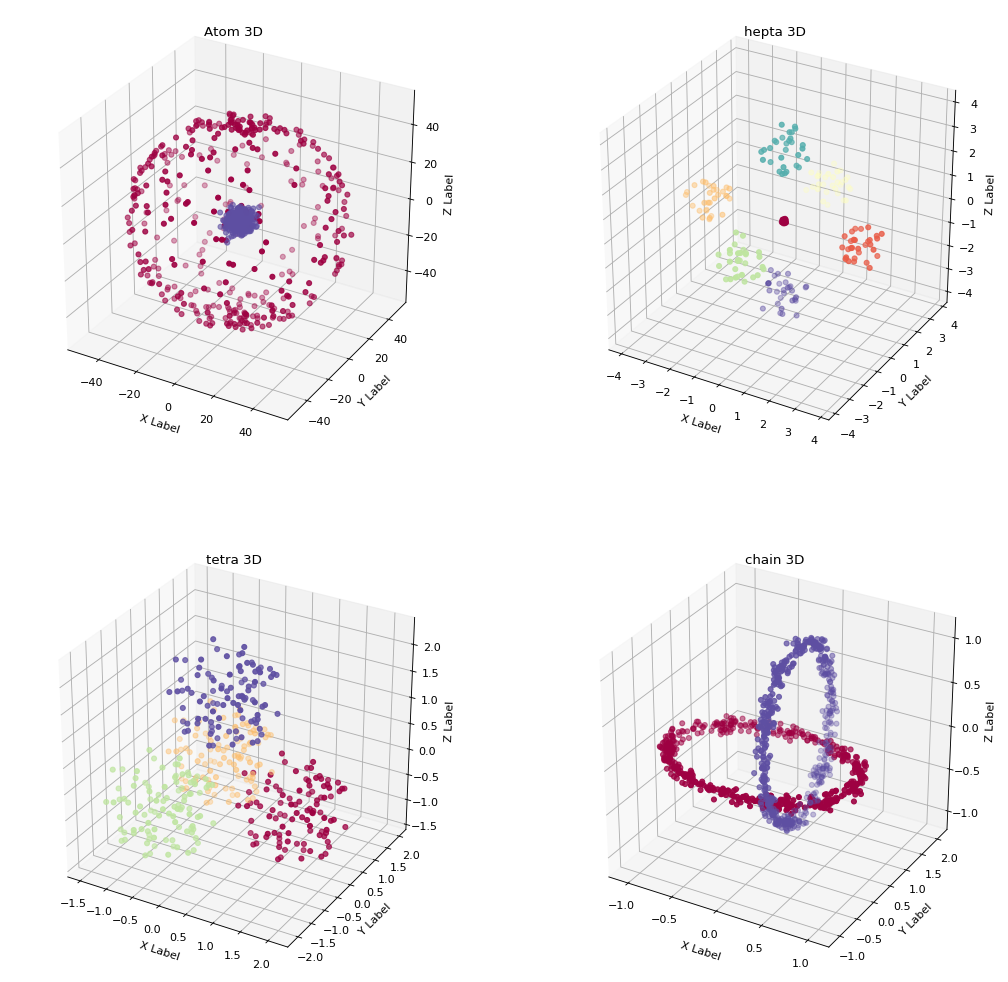

In [46]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import


fig = plt.figure(num=None, figsize=(16, 16), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(221, projection='3d')
ax.scatter(atom['fea'][:,0], atom['fea'][:,1], atom['fea'][:,2], c=atom['gnd'][:,0], cmap=plt.cm.Spectral)
ax.set_xlabel('X Label'); ax.set_ylabel('Y Label'); ax.set_zlabel('Z Label')
title('Atom 3D')

ax = fig.add_subplot(222, projection='3d')
ax.scatter(hepta['fea'][:,0], hepta['fea'][:,1], hepta['fea'][:,2], c=hepta['gnd'][:,0], cmap=plt.cm.Spectral)
ax.set_xlabel('X Label'); ax.set_ylabel('Y Label'); ax.set_zlabel('Z Label')
title('hepta 3D')

ax = fig.add_subplot(223, projection='3d')
ax.scatter(tetra['fea'][:,0], tetra['fea'][:,1], tetra['fea'][:,2], c=tetra['gnd'][:,0], cmap=plt.cm.Spectral)
ax.set_xlabel('X Label'); ax.set_ylabel('Y Label'); ax.set_zlabel('Z Label')
title('tetra 3D')

ax = fig.add_subplot(224, projection='3d')
ax.scatter(chain['fea'][:,0], chain['fea'][:,1], chain['fea'][:,2], c=chain['gnd'][:,0], cmap=plt.cm.Spectral)
ax.set_xlabel('X Label'); ax.set_ylabel('Y Label'); ax.set_zlabel('Z Label')
title('chain 3D')

plt.show()



### Apply methods

Isomap<br>
PCA<br>
MDS<br>
LLE<br>
Eigen<br>
Deep Autoencoder

In [65]:
atom_scaled = minmax_scale(atom['fea'], axis = 0)
hepta_scaled = minmax_scale(hepta['fea'], axis = 0)
tetra_scaled = minmax_scale(tetra['fea'], axis = 0)
chain_scaled = minmax_scale(chain['fea'], axis = 0)

# Atom

In [102]:
isomap = Isomap(n_components=2).fit_transform(atom['fea']); 
pca = PCA(n_components=2).fit_transform(atom['fea'])
mds = MDS(n_components=2).fit_transform(atom['fea'])
lle = LocallyLinearEmbedding(n_components=2, n_neighbors= 80, eigen_solver='dense').fit_transform(atom['fea'])
eigen = method = LocallyLinearEmbedding(n_components=2,  n_neighbors=80, method='hessian', eigen_solver='dense').fit_transform(atom['fea'])

In [103]:
# Define the AE structure
input_dim = Input(shape = (3, ))
bottleneck = Dense(2, activation = 'elu')(input_dim)
decoded = Dense(3, activation = 'sigmoid')(bottleneck)

# Compile and train the AE
autoencoder = Model(inputs = input_dim, outputs = decoded)
autoencoder.compile(optimizer = 'adam', loss = 'mean_squared_error')
autoencoder.fit(atom_scaled, atom_scaled, epochs = 100, batch_size = 80, shuffle = False, verbose = False
               ,validation_data=(atom_scaled, atom_scaled))

# Extract the compressed Bottleneck representation
encoder = Model(inputs = input_dim, outputs = bottleneck)
encoded_atom = pd.DataFrame(encoder.predict(atom_scaled))
encoded_atom = encoded_atom.add_prefix('feature_')

#atom_scaled = minmax_scale(atom['fea'], axis = 0)
#m = Sequential()
#m.add(Dense(2,  activation='elu', input_shape=(3,), name="bottleneck"))
#m.add(Dense(3,  activation='sigmoid'))
#m.compile(loss='binary_crossentropy', optimizer = Adam())# adadelta 

#history = m.fit(atom_scaled, atom_scaled, batch_size=80, epochs=40, verbose=0, 
#                validation_data=(atom_scaled, atom_scaled))

#encoder = Model(m.input, m.get_layer('bottleneck').output)
#Zenc = encoder.predict(atom_scaled)  # bottleneck representation
#Renc = m.predict(atom_scaled)        # reconstruction

Text(0.5, 1.0, 'Deep AE on Atom')

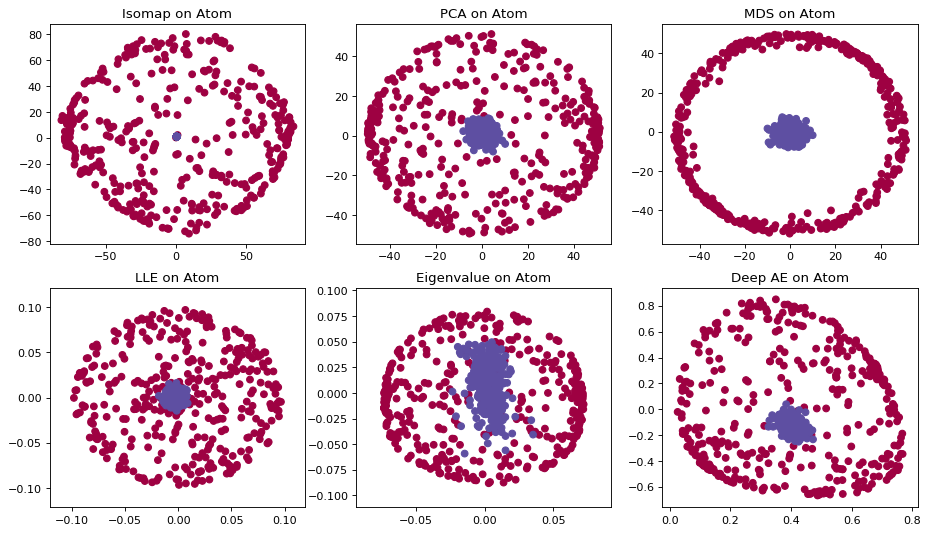

In [104]:
figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
color = atom['gnd'][:,0]
## Isomap
subplot(2, 3, 1)
scatter(isomap[:,0], isomap[:,1], c=color, cmap=plt.cm.Spectral)
title('Isomap on Atom')
## PCA
subplot(2, 3, 2)
scatter(pca[:,0], pca[:,1], c=color, cmap=plt.cm.Spectral)
title('PCA on Atom')
## MDS
subplot(2, 3, 3)
scatter(mds[:,0], mds[:,1], c=color, cmap=plt.cm.Spectral)
title('MDS on Atom')
## LLE
subplot(2, 3, 4)
scatter(lle[:,0], lle[:,1], c=color, cmap=plt.cm.Spectral)
title('LLE on Atom')
## Eigenvalue
subplot(2, 3, 5)
scatter(eigen[:,0], eigen[:,1], c=color, cmap=plt.cm.Spectral)
title('Eigenvalue on Atom')
##
subplot(2, 3, 6)
scatter(encoded_atom.feature_0, encoded_atom.feature_1, c=color, cmap=plt.cm.Spectral)
#scatter(Zenc[:,0], Zenc[:,1], c=color, cmap=plt.cm.Spectral)
title('Deep AE on Atom')


# Hepta

In [99]:
isomap = Isomap(n_components=2).fit_transform(hepta['fea']); 
pca = PCA(n_components=2).fit_transform(hepta['fea'])
mds = MDS(n_components=2).fit_transform(hepta['fea'])
lle = LocallyLinearEmbedding(n_components=2,n_neighbors= 40, eigen_solver='dense').fit_transform(hepta['fea'])
eigen = method = LocallyLinearEmbedding(n_components=2, n_neighbors=40, method='hessian', eigen_solver='dense').fit_transform(hepta['fea'])

In [100]:
# Define the AE structure
input_dim = Input(shape = (3, ))
bottleneck = Dense(2, activation = 'elu')(input_dim)
decoded = Dense(3, activation = 'sigmoid')(bottleneck)

# Compile and train the AE
autoencoder = Model(inputs = input_dim, outputs = decoded)
autoencoder.compile(optimizer = 'adam', loss = 'mean_squared_error')
autoencoder.fit(hepta_scaled, hepta_scaled, epochs = 100, batch_size = 80, shuffle = False, verbose = False
               ,validation_data=(hepta_scaled, hepta_scaled))

# Extract the compressed Bottleneck representation
encoder = Model(inputs = input_dim, outputs = bottleneck)
encoded_atom = pd.DataFrame(encoder.predict(hepta_scaled))
encoded_atom = encoded_atom.add_prefix('feature_')

Text(0.5, 1.0, 'Deep AE on Hepta')

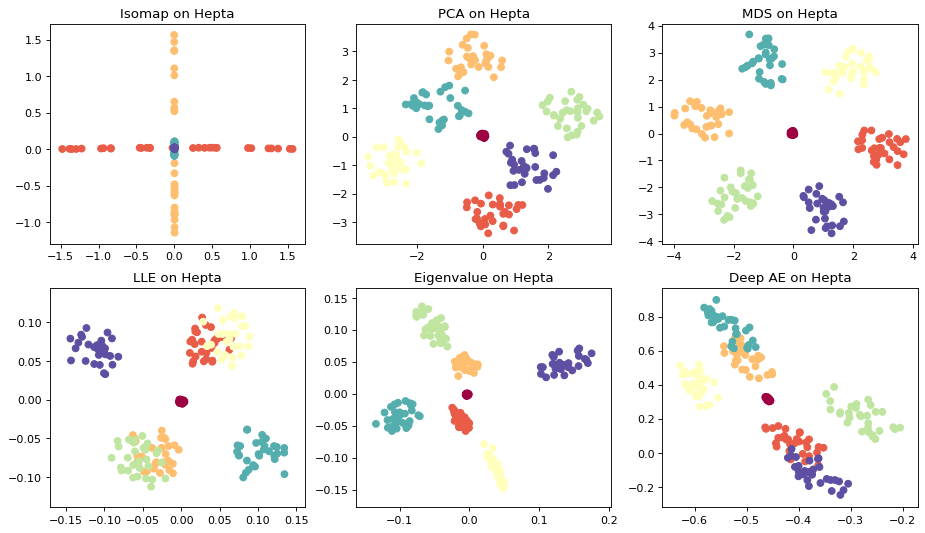

In [101]:
figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
color = hepta['gnd'][:,0]
## Isomap
subplot(2, 3, 1)
scatter(isomap[:,0], isomap[:,1], c=color, cmap=plt.cm.Spectral)
title('Isomap on Hepta')
## PCA
subplot(2, 3, 2)
scatter(pca[:,0], pca[:,1], c=color, cmap=plt.cm.Spectral)
title('PCA on Hepta')
## MDS
subplot(2, 3, 3)
scatter(mds[:,0], mds[:,1], c=color, cmap=plt.cm.Spectral)
title('MDS on Hepta')
## LLE
subplot(2, 3, 4)
scatter(lle[:,0], lle[:,1], c=color, cmap=plt.cm.Spectral)
title('LLE on Hepta')
## Eigenvalue
subplot(2, 3, 5)
scatter(eigen[:,0], eigen[:,1], c=color, cmap=plt.cm.Spectral)
title('Eigenvalue on Hepta')
##
subplot(2, 3, 6)
scatter(encoded_atom.feature_0, encoded_atom.feature_1, c=color, cmap=plt.cm.Spectral)
#scatter(Zenc[:,0], Zenc[:,1], c=color, cmap=plt.cm.Spectral)
title('Deep AE on Hepta')



# Tetra

In [121]:
isomap = Isomap(n_components=2).fit_transform(tetra['fea']); 
pca = PCA(n_components=2).fit_transform(tetra['fea'])
mds = MDS(n_components=2).fit_transform(tetra['fea'])
lle = LocallyLinearEmbedding(n_components=2, n_neighbors= 80, eigen_solver='dense').fit_transform(tetra['fea'])
eigen = method = LocallyLinearEmbedding(n_components=2,  n_neighbors=80, method='hessian', eigen_solver='dense').fit_transform(tetra['fea'])

In [132]:
# Define the AE structure
input_dim = Input(shape = (3, ))
bottleneck = Dense(2, activation = 'tanh')(input_dim)
decoded = Dense(3, activation = 'tanh')(bottleneck)

# Compile and train the AE
autoencoder = Model(inputs = input_dim, outputs = decoded)
autoencoder.compile(optimizer = 'adam', loss = 'mean_squared_error')
autoencoder.fit(tetra_scaled, tetra_scaled, epochs = 150, batch_size = 200, shuffle = False, verbose = False
                ,validation_data=(tetra_scaled, tetra_scaled))

# Extract the compressed Bottleneck representation
encoder = Model(inputs = input_dim, outputs = bottleneck)
encoded_atom = pd.DataFrame(encoder.predict(tetra_scaled))
encoded_atom = encoded_atom.add_prefix('feature_')

Text(0.5, 1.0, 'Deep AE on Hepta')

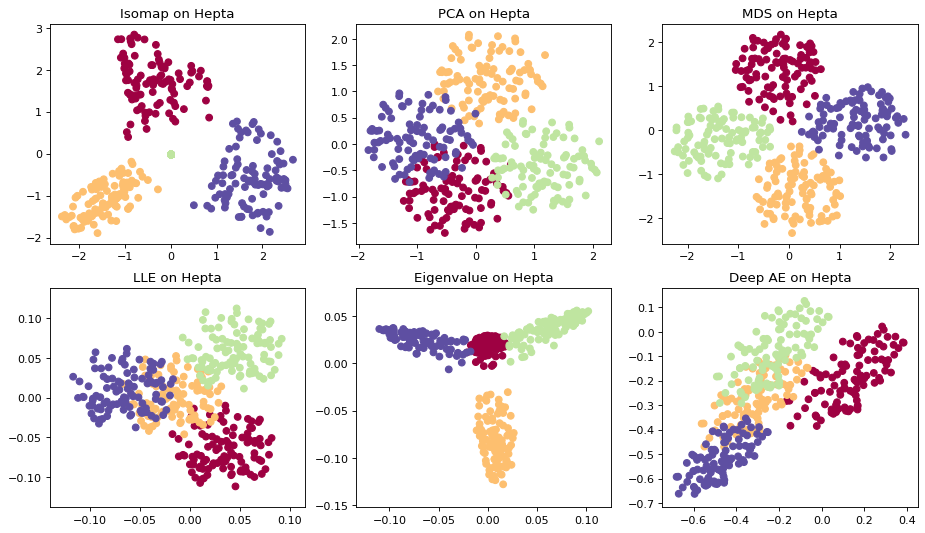

In [133]:
figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
color = tetra['gnd'][:,0]
## Isomap
subplot(2, 3, 1)
scatter(isomap[:,0], isomap[:,1], c=color, cmap=plt.cm.Spectral)
title('Isomap on Hepta')
## PCA
subplot(2, 3, 2)
scatter(pca[:,0], pca[:,1], c=color, cmap=plt.cm.Spectral)
title('PCA on Hepta')
## MDS
subplot(2, 3, 3)
scatter(mds[:,0], mds[:,1], c=color, cmap=plt.cm.Spectral)
title('MDS on Hepta')
## LLE
subplot(2, 3, 4)
scatter(lle[:,0], lle[:,1], c=color, cmap=plt.cm.Spectral)
title('LLE on Hepta')
## Eigenvalue
subplot(2, 3, 5)
scatter(eigen[:,0], eigen[:,1], c=color, cmap=plt.cm.Spectral)
title('Eigenvalue on Hepta')
##
subplot(2, 3, 6)
scatter(encoded_atom.feature_0, encoded_atom.feature_1, c=color, cmap=plt.cm.Spectral)
#scatter(Zenc[:,0], Zenc[:,1], c=color, cmap=plt.cm.Spectral)
title('Deep AE on Hepta')



# Chain

In [109]:
isomap = Isomap(n_components=2).fit_transform(chain['fea']); 
pca = PCA(n_components=2).fit_transform(chain['fea'])
mds = MDS(n_components=2).fit_transform(chain['fea'])
lle = LocallyLinearEmbedding(n_components=2, n_neighbors= 80, eigen_solver='dense').fit_transform(chain['fea'])
eigen = method = LocallyLinearEmbedding(n_components=2,  n_neighbors=80, method='hessian', eigen_solver='dense').fit_transform(chain['fea'])

In [119]:
# Define the AE structure
input_dim = Input(shape = (3, ))
bottleneck = Dense(2, activation = 'tanh')(input_dim)
decoded = Dense(3, activation = 'tanh')(bottleneck)

# Compile and train the AE
autoencoder = Model(inputs = input_dim, outputs = decoded)
autoencoder.compile(optimizer = 'adam', loss = 'mean_squared_error')
autoencoder.fit(chain_scaled, chain_scaled, epochs = 100, batch_size = 80, shuffle = False, verbose = False
                ,validation_data=(chain_scaled, chain_scaled))

# Extract the compressed Bottleneck representation
encoder = Model(inputs = input_dim, outputs = bottleneck)
encoded_atom = pd.DataFrame(encoder.predict(chain_scaled))
encoded_atom = encoded_atom.add_prefix('feature_')

Text(0.5, 1.0, 'Deep AE on Hepta')

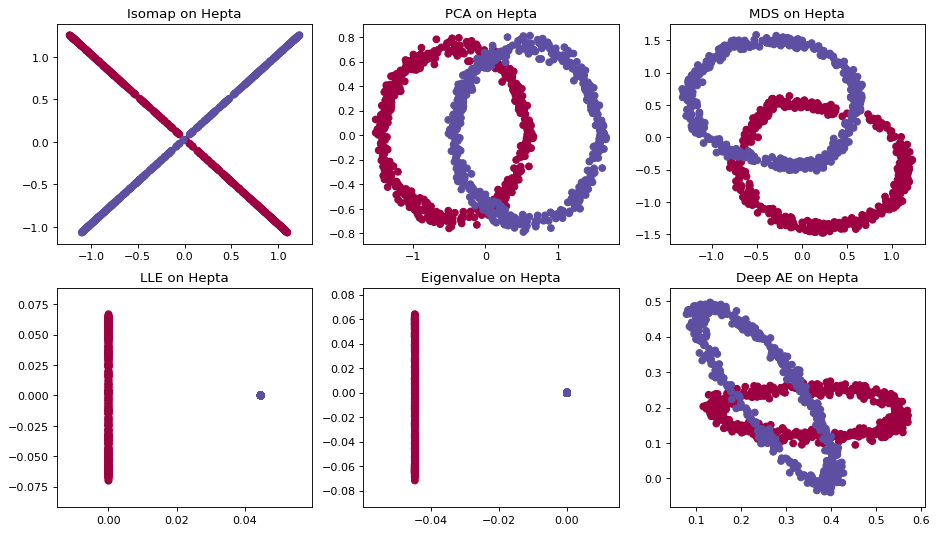

In [120]:
figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
color = chain['gnd'][:,0]
## Isomap
subplot(2, 3, 1)
scatter(isomap[:,0], isomap[:,1], c=color, cmap=plt.cm.Spectral)
title('Isomap on Hepta')
## PCA
subplot(2, 3, 2)
scatter(pca[:,0], pca[:,1], c=color, cmap=plt.cm.Spectral)
title('PCA on Hepta')
## MDS
subplot(2, 3, 3)
scatter(mds[:,0], mds[:,1], c=color, cmap=plt.cm.Spectral)
title('MDS on Hepta')
## LLE
subplot(2, 3, 4)
scatter(lle[:,0], lle[:,1], c=color, cmap=plt.cm.Spectral)
title('LLE on Hepta')
## Eigenvalue
subplot(2, 3, 5)
scatter(eigen[:,0], eigen[:,1], c=color, cmap=plt.cm.Spectral)
title('Eigenvalue on Hepta')
##
subplot(2, 3, 6)
scatter(encoded_atom.feature_0, encoded_atom.feature_1, c=color, cmap=plt.cm.Spectral)
#scatter(Zenc[:,0], Zenc[:,1], c=color, cmap=plt.cm.Spectral)
title('Deep AE on Hepta')


# Algorithm Implementation 

### Define LLE functions

Compute k nearest neighbors

In [36]:
def Knbor_Mat(X, K, t = 2.0, dist_metric = "euclidean", algorithm = "ball_tree"):
    
    n,p = X.shape
    
    knn = neighbors.NearestNeighbors(K+1, metric = dist_metric, algorithm=algorithm).fit(X)
    distances, nbors = knn.kneighbors(X)
    
    return(nbors[:,1:])

Compute the Weights Matrix 

In [37]:
from scipy.linalg import solve
def get_weights(X, nbors, reg, K):
    
    n,p = X.shape
    
    Weights = np.zeros((n,n))
    
    for i in range(n):
        
        X_bors = X[nbors[i],:] - X[i]
        cov_nbors = np.dot(X_bors, X_bors.T)
        
        #regularization tems
        trace = np.trace(cov_nbors)
        if trace >0 :
            R = reg*trace
        else:
            R = reg
        
        cov_nbors.flat[::K+1] += R
        weights = solve(cov_nbors, np.ones(K).T, sym_pos=True)

        weights = weights/weights.sum()
        Weights[i, nbors[i]] = weights
        
    return(Weights)

Calculate the new embedding

In [38]:
from scipy.linalg import eigh

def Y_(Weights,d):
    n,p = Weights.shape
    I = np.eye(n)
    m = (I-Weights)
    M = m.T.dot(m)
    
    eigvals, eigvecs = eigh(M, eigvals=(1, d), overwrite_a=True)
    ind = np.argsort(np.abs(eigvals))
    
    return(eigvecs[:, ind])

### Define AE loss function

In [337]:
def custom_loss(bottleneck, W):
    def loss(y_true,y_pred):
        return keras.losses.mean_squared_error(y_true, y_pred) + 0.4 * keras.losses.mean_squared_error(bottleneck, tf.tensordot(W,bottleneck,1))
    # Return a function
    return loss

## Import MNIST Dataset

In [115]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [11]:
orl = scipy.io.loadmat('data/ORL_32x32.mat')
yale = scipy.io.loadmat('data/YALE_32x32.mat')
usps = scipy.io.loadmat('data/USPS.mat')
coil20 = scipy.io.loadmat('data/COIL20.mat')
coil100 = scipy.io.loadmat('data/COIL100.mat')

In [124]:
len(coil20['fea'])

1440

# Coil 20

In [125]:
isomap = Isomap(n_components=2).fit_transform(coil20['fea']); 
pca = PCA(n_components=2).fit_transform(coil20['fea'])
mds = MDS(n_components=2).fit_transform(coil20['fea'])
lle = LocallyLinearEmbedding(n_components=2, n_neighbors= 150, eigen_solver='dense').fit_transform(coil20['fea'])
eigen = method = LocallyLinearEmbedding(n_components=2,  n_neighbors=150, method='hessian', eigen_solver='dense').fit_transform(coil20['fea'])

Text(0.5, 1.0, 'Eigenvalue on Hepta')

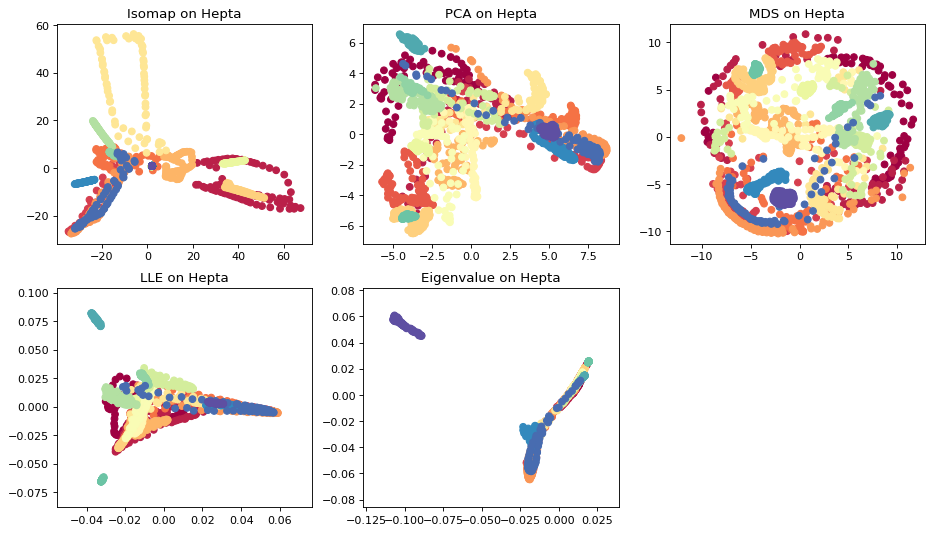

In [127]:
figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
color = coil20['gnd'][:,0]
## Isomap
subplot(2, 3, 1)
scatter(isomap[:,0], isomap[:,1], c=color, cmap=plt.cm.Spectral)
title('Isomap on Hepta')
## PCA
subplot(2, 3, 2)
scatter(pca[:,0], pca[:,1], c=color, cmap=plt.cm.Spectral)
title('PCA on Hepta')
## MDS
subplot(2, 3, 3)
scatter(mds[:,0], mds[:,1], c=color, cmap=plt.cm.Spectral)
title('MDS on Hepta')
## LLE
subplot(2, 3, 4)
scatter(lle[:,0], lle[:,1], c=color, cmap=plt.cm.Spectral)
title('LLE on Hepta')
## Eigenvalue
subplot(2, 3, 5)
scatter(eigen[:,0], eigen[:,1], c=color, cmap=plt.cm.Spectral)
title('Eigenvalue on Hepta')


In [356]:
input_dim = Input(shape = (len(coil20['fea'][0]), ))
#encoded = Dense(512, activation = 'elu')(input_dim)
bottleneck = Dense(150, activation = 'elu')(input_dim)
#decoded1 = Dense(512, activation = 'elu')(bottleneck)
decoded = Dense(len(coil20['fea'][0]), activation = 'sigmoid')(bottleneck)
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=2,
                              verbose=0, mode='auto')

autoencoder = Model(inputs = input_dim, outputs = decoded)
autoencoder.compile(optimizer = 'adam', loss = 'mean_squared_error')
autoencoder.fit(orl['fea'], 
                orl['fea'], 
                callbacks=[early_stop],
                epochs = 50, 
                batch_size = len(coil20['fea']), 
                shuffle = True,
                verbose = 0,
                validation_data=(coil20['fea'], coil20['fea']))

In [357]:
encoder_ = Model(inputs = input_dim, outputs = bottleneck)
encoder_orl = pd.DataFrame(encoder_.predict(coil20['fea']))

In [358]:
k = 100
reg = 0.0001
nbors = Knbor_Mat(encoder_orl.values,k)
W = tf.convert_to_tensor(get_weights(encoder_orl.values, nbors, reg, k),dtype=tf.float32)

for i in range(5):
    autoencoder.compile(optimizer = 'adam', loss = custom_loss(bottleneck, W))
    autoencoder.fit(coil20['fea'], coil20['fea'], 
                    epochs = 50, 
                    batch_size = len(coil20['fea']), 
                    shuffle = True,
                    verbose = 0,
                    callbacks=[early_stop],
                    validation_data=(coil20['fea'], coil20['fea']))
    encoder_ = Model(inputs = input_dim, outputs = bottleneck)
    encoder_orl = pd.DataFrame(encoder_.predict(coil20['fea']))
    nbors = Knbor_Mat(encoder_orl.values,k)
    W = tf.convert_to_tensor(get_weights(encoder_orl.values, nbors, reg, k),dtype=tf.float32)

Text(0.5, 1.0, 'Deep AE on Atom')

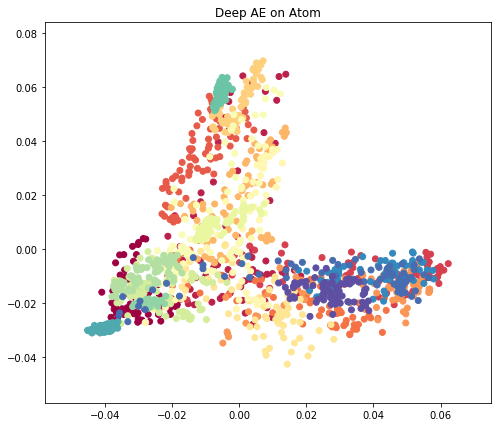

In [359]:
plt.figure(figsize=(8,7))

Y = Y_(W.numpy(),2)

color = coil20['gnd'][:,0]
scatter(Y[:,0], Y[:,1], c=color, cmap=plt.cm.Spectral)
title('Deep AE on Atom')

In [378]:
input_dim = Input(shape = (len(coil100['fea'][0]), ))
#encoded = Dense(512, activation = 'elu')(input_dim)
bottleneck = Dense(64, activation = 'elu')(input_dim)
#decoded1 = Dense(512, activation = 'elu')(bottleneck)
decoded = Dense(len(coil100['fea'][0]), activation = 'sigmoid')(bottleneck)
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=2,
                              verbose=0, mode='auto')

autoencoder = Model(inputs = input_dim, outputs = decoded)
autoencoder.compile(optimizer = 'adam', loss = 'mean_squared_error')
autoencoder.fit(orl['fea'], 
                orl['fea'], 
                callbacks=[early_stop],
                epochs = 50, 
                batch_size = len(coil100['fea']), 
                shuffle = True,
                verbose = 0,
                validation_data=(coil100['fea'], coil100['fea']))

In [379]:
encoder_ = Model(inputs = input_dim, outputs = bottleneck)
encoder_orl = pd.DataFrame(encoder_.predict(coil100['fea']))

In [382]:
k = 300
reg = 0.0001
nbors = Knbor_Mat(encoder_orl.values,k)
W = tf.convert_to_tensor(get_weights(encoder_orl.values, nbors, reg, k),dtype=tf.float32)

for i in range(4):
    autoencoder.compile(optimizer = 'adam', loss = custom_loss(bottleneck, W))
    autoencoder.fit(coil100['fea'], coil100['fea'], 
                    epochs = 50, 
                    batch_size = len(coil100['fea']), 
                    shuffle = True,
                    verbose = 0,
                    callbacks=[early_stop],
                    validation_data=(coil100['fea'], coil100['fea']))
    encoder_ = Model(inputs = input_dim, outputs = bottleneck)
    encoder_orl = pd.DataFrame(encoder_.predict(coil100['fea']))
    nbors = Knbor_Mat(encoder_orl.values,k)
    W = tf.convert_to_tensor(get_weights(encoder_orl.values, nbors, reg, k),dtype=tf.float32)

Text(0.5, 1.0, 'Deep AE on Atom')

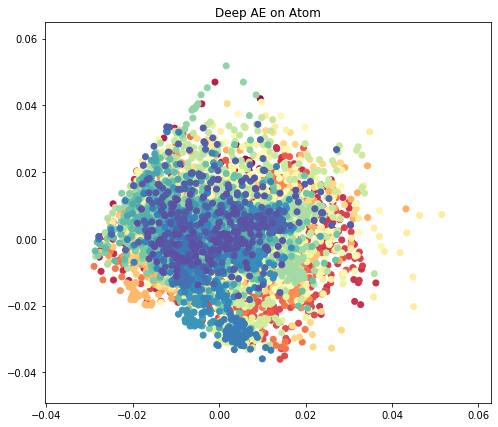

In [383]:
plt.figure(figsize=(8,7))

Y = Y_(W.numpy(),2)

color = coil100['gnd'][:,0]
scatter(Y[:,0], Y[:,1], c=color, cmap=plt.cm.Spectral)
title('Deep AE on Atom')